In [182]:
% reset
from theano import tensor

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
x_tilde = x = tensor.zeros((10,2,32,32))
input_x = tensor.unbroadcast(
    tensor.concatenate([x, x_tilde], axis=0), *range(x.ndim))

In [9]:
input_x.eval().shape

(20, 2, 32, 32)

In [195]:
'''loading fuel dataset'''
# % reset
from fuel.datasets.hdf5 import H5PYDataset
# mnist_train = H5PYDataset('/home/hope-yao/Documents/Data/bmnist.hdf5', which_sets=('train',))
mnist_test = H5PYDataset('/home/hope-yao/Documents/Data/rectcrs.hdf5', which_sets=('train',))

In [196]:
handletest = mnist_test.open()
test_data = mnist_test.get_data(handletest, slice(0, 200))
print((test_data[0].shape))

(200, 1, 64, 64)


In [29]:
from ali.utils import get_log_odds, conv_brick, conv_transpose_brick, bn_brick
from blocks.bricks import LeakyRectifier, Logistic
LEAK = 0.02
from blocks.bricks.conv import ConvolutionalSequence
NUM_CHANNELS = 3
IMAGE_SIZE = (64, 64)

layers = [
    conv_brick(2, 1, 64), LeakyRectifier(leak=LEAK),
    conv_brick(7, 2, 128), bn_brick(), LeakyRectifier(leak=LEAK),
#     conv_brick(5, 2, 256), bn_brick(), LeakyRectifier(leak=LEAK),
#     conv_brick(7, 2, 256), bn_brick(), LeakyRectifier(leak=LEAK),
#     conv_brick(4, 1, 512), bn_brick(), LeakyRectifier(leak=LEAK)
    ]
x_discriminator = ConvolutionalSequence(
    layers=layers, num_channels=NUM_CHANNELS, image_size=IMAGE_SIZE,
    use_bias=False, name='x_discriminator')

In [30]:
x_discriminator.apply(tensor.zeros((200,3,64,64))).eval().shape

(200, 128, 29, 29)

In [183]:
import numpy as np
import theano
from theano import tensor
from blocks.serialization import load

nrows = 4
ncols = 10
with open('ali_conditional_celeba.tar', 'rb') as src:
    main_loop = load(src)
ali, = main_loop.model.top_bricks
input_shape = ali.encoder.get_dim('output')

In [184]:
x = tensor.tensor4('features')
z = tensor.tensor4('features')
y = tensor.matrix('y')

sample = theano.function([z, y], ali.decode(z, y))
recons = theano.function([x, y], ali.reconstruct(x, y))
# interp = theano.function([x, y], ali.decode_embedded(x, y))

In [185]:
def viz(img):
   
    import seaborn as sns
    sns.set_style("whitegrid", {'axes.grid' : False})
    import matplotlib.pyplot as plt
    plt.figure(figsize=(2.5,1.5))
    img = np.squeeze(img)
#     img = np.squeeze(img).swapaxes(0, 1).swapaxes(1, 2)
    ax = plt.imshow(img)
    plt.axis('off')
    return ax

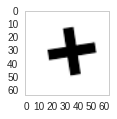

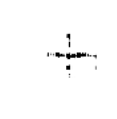

In [209]:
# random z, y from 000001.jpg
% matplotlib inline
import theano
from theano import tensor
from ali.streams import create_celeba_data_streams, create_crs_data_streams

BATCH_SIZE = 128
MONITORING_BATCH_SIZE = 128

# streams = create_crs_data_streams(BATCH_SIZE, MONITORING_BATCH_SIZE,
#                                      sources=('features', 'targets'))
# main_loop_stream, train_monitor_stream, valid_monitor_stream = streams

ii = 50
x = next(main_loop_stream.get_epoch_iterator())[0][ii:ii+1]
y = next(main_loop_stream.get_epoch_iterator())[1][ii:ii+1]
# img = recons(x,y)

xxxx = tensor.tensor4('features')
yyyy = tensor.matrix('y')
eeee = tensor.tensor4('e')
# embedder = theano.function([yyyy], ali.embedder.apply(yyyy))
embeddings = embedder(y)
# encoder = theano.function([xxxx, eeee], ali.encoder.apply(xxxx,eeee))
encoded = encoder(x, embeddings)
# decoder = theano.function([xxxx, eeee], ali.decoder.apply(xxxx,eeee))
img = decoder(encoded, embeddings)

import matplotlib.pyplot as plt
plt.figure(figsize=(2.5,1.5))
plt.imshow(np.squeeze(x))
plt.show()
# img = func(encoded[1:2,:,:,:],y)
viz(img)

In [141]:
% reset
from fuel.datasets.hdf5 import H5PYDataset
import numpy as np
mnist_test = H5PYDataset('/home/hope-yao/Documents/Data/rectcrs.hdf5', which_sets=('train',))
handletest = mnist_test.open()
x = mnist_test.get_data(handletest, slice(0, 1))
# y = self.pre_encoder.apply(x)
np.asarray(x[0]).shape

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


(1, 1, 64, 64)

ValueError: could not broadcast input array from shape (128,3,64,64) into shape (40,3,64,64)

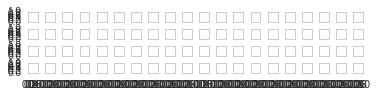

In [136]:
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy

# x = tensor.tensor4('features')
# y = tensor.matrix('y')
# # reconstructions = theano.function([x, y], ali.reconstruct(x, y))(examples, labels)
# examples, labels = next(main_loop_stream.get_epoch_iterator())

# print("LABELS SHAPE: ", labels.shape)
# print("LABELS[0]: ", labels[0][:4])
# embeddings = theano.function([y], ali.embed(y))(labels)
# print("EMBEDDINGS SHAPE: ", embeddings.shape)
# print("EMBEDDINGS[0]: ", embeddings[0][:4])
# encoded = theano.function([x, y], ali.encode(x, y))(examples, labels)
# print("ENCODED SHAPE: ", encoded.shape)
# print("ENCODED[0]: ", encoded[0][:4])

figure = plt.figure()
grid = ImageGrid(figure, 111, (nrows, 2 * ncols), axes_pad=0.1)
images = numpy.empty(
    (2 * nrows * ncols,) + examples.shape[1:], dtype=examples.dtype)
images[::2] = examples
images[1::2] = reconstructions

for image, axis in zip(images, grid):
    axis.imshow(image.transpose(1, 2, 0).squeeze(),
                cmap=cm.Greys_r, interpolation='nearest')
    axis.set_yticklabels(['' for _ in range(image.shape[1])])
    axis.set_xticklabels(['' for _ in range(image.shape[2])])
    axis.axis('off')

plt.show()


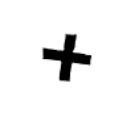

In [172]:
# random z, y from 000001.jpg
% matplotlib inline
encoded = np.random.normal(size=(nrows * ncols, 256, 1, 1)).astype(np.float32)
y = [[0,1]]
img = sample(encoded[1:2,:,:,:],y)
viz(img)

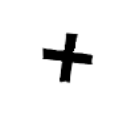

In [173]:
# bald activated
% matplotlib inline
y = [[1,1]]
img = sample(encoded[1:2,:,:,:],y)
viz(img)

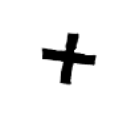

In [174]:
# black hair activated
% matplotlib inline
y = [[1,0]]
img = sample(encoded[1:2,:,:,:],y)
viz(img)

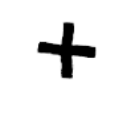

In [175]:
# black hair activated
% matplotlib inline
y = [[0,0]]
img = sample(encoded[21:22,:,:,:],y)
ax = viz(img)

In [176]:
# black hair activated
% matplotlib inline
yy = y
yy[0][20] = 1
img = func(encoded[1:2,:,:,:],yy)
viz(img)

IndexError: list assignment index out of range

In [14]:
# %reset
from ali.streams import create_celeba_data_streams, create_crs_data_streams

BATCH_SIZE = 128
MONITORING_BATCH_SIZE = 128

streams = create_crs_data_streams(BATCH_SIZE, MONITORING_BATCH_SIZE,
                                     sources=('features', 'targets'))
main_loop_stream1, train_monitor_stream, valid_monitor_stream = streams
# bn_monitored_variables = (
#     [v for v in bn_model.auxiliary_variables if 'norm' not in v.name] +
#     bn_model.outputs)
next(main_loop_stream1.get_epoch_iterator())[1].shape

(128, 40)

In [15]:
# %reset
from ali.streams import create_celeba_data_streams, create_crs_data_streams

BATCH_SIZE = 128
MONITORING_BATCH_SIZE = 128

streams = create_celeba_data_streams(BATCH_SIZE, MONITORING_BATCH_SIZE,
                                     sources=('features', 'targets'))
main_loop_stream, train_monitor_stream, valid_monitor_stream = streams
# bn_monitored_variables = (
#     [v for v in bn_model.auxiliary_variables if 'norm' not in v.name] +
#     bn_model.outputs)
next(main_loop_stream.get_epoch_iterator())[1].shape

(128, 40)

In [45]:
next(main_loop_stream.get_epoch_iterator())

(array([[[[ 0.00392157,  0.00392157,  0.00392157, ...,  0.00392157,
            0.00392157,  0.00392157],
          [ 0.00392157,  0.00392157,  0.00392157, ...,  0.00392157,
            0.00392157,  0.00392157],
          [ 0.00392157,  0.00392157,  0.00392157, ...,  0.00392157,
            0.00392157,  0.00392157],
          ..., 
          [ 0.24313726,  0.23137255,  0.24705882, ...,  0.38039216,
            0.37254903,  0.39215687],
          [ 0.25098041,  0.25098041,  0.25098041, ...,  0.36470589,
            0.33725491,  0.32941177],
          [ 0.27058825,  0.25882354,  0.25882354, ...,  0.42352942,
            0.41568628,  0.40392157]],
 
         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          ..., 
          [

In [33]:
dir(main_loop_stream1.data_stream)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_sourcewise_transformation',
 '_produces_examples',
 'axis_labels',
 'child_epoch_iterator',
 'close',
 'data_stream',
 'get_data',
 'get_epoch_iterator',
 'iterate_epochs',
 'iteration_scheme',
 'next_epoch',
 'produces_examples',
 'reset',
 'scale',
 'shift',
 'sources',
 'transform_any',
 'transform_any_source',
 'transform_batch',
 'transform_example',
 'transform_source_batch',
 'transform_source_example',
 'which_sources']